In [2]:
from detectors import Morph, HED, ocr
import cv2
import os
from lib.utils import plt_imshow, find_contours, draw_contours
import imutils
import numpy as np

org_img = cv2.imread('image/navy_05.jpg', cv2.IMREAD_COLOR)

[RCF] loading...
[RCF] finished loading (0.0490 sec)
시작시간 : 2022-09-19 13:02:34.340566
종료시간 : 2022-09-19 13:02:34.672720
수행시간 : 0 초



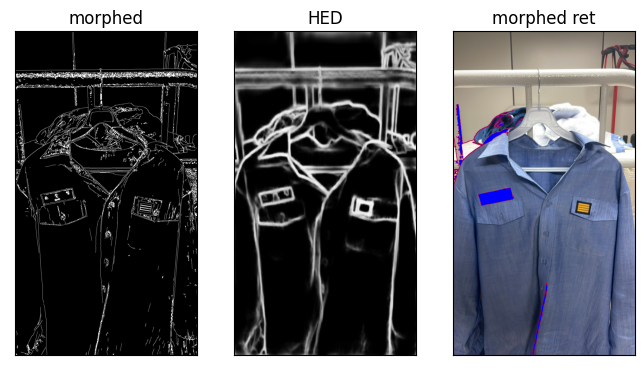

In [3]:
# load Engine
morph_engine, HED_engine = Morph(), HED()

# get edge image
morphed_edge, ret = morph_engine.detect_edge(org_img)
hed_edge = HED_engine.detect_edge(org_img, 500, 500)
# _, mixed = morph_engine.detect_edge(hed_edge, isEdge=True)

# show
plt_imshow(["morphed", "HED", "morphed ret"], [morphed_edge, hed_edge, ret])
# plt_imshow(["morphed", "HED", "mixed"], [morphed_edge, hed_edge, mixed])


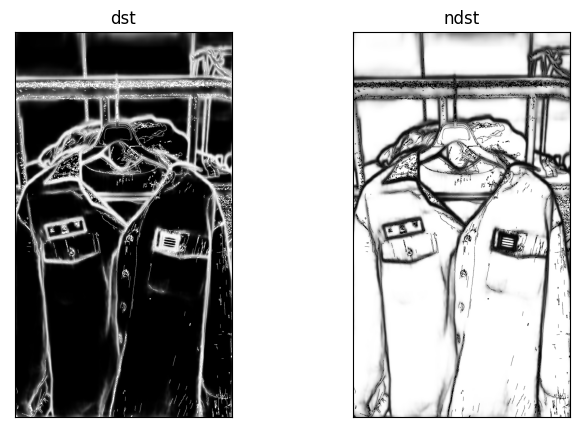

In [4]:
dst = cv2.bitwise_or(morphed_edge, hed_edge)
ndst = cv2.bitwise_not(dst)
plt_imshow(['dst', 'ndst'], [dst, ndst])

엉_조준_이_CHO


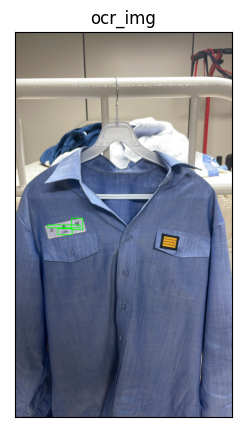

In [5]:
obj = ocr.ocr(org_img)

print(obj['str'])
plt_imshow(['ocr_img'], [obj['img']])

[27 95 26 28 -1]
lev :  [64 65 63 -1 27]
lev :  [70 71 69 -1 27]


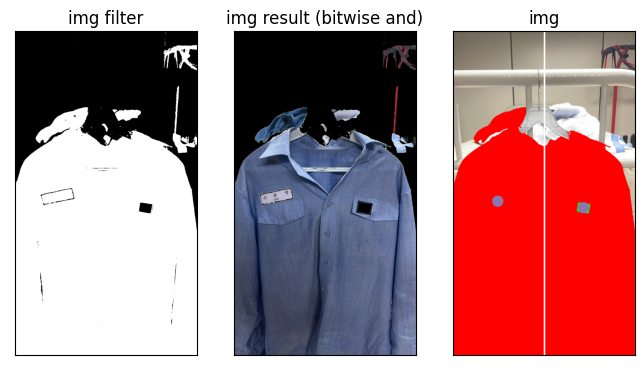

In [10]:
def checkBlue(img):
    # img = cv2.resize(img, (500,500))
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    lower, upper = (50, 10, 30), (255, 255, 255) # 샘당 filter
    img_mask = cv2.inRange(hsv, lower, upper)
    img_result = cv2.bitwise_and(img, img, mask=img_mask)

    contours, hierarchy = cv2.findContours(img_mask, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    hierarchy = hierarchy[0]
    hierarchy = [np.insert(hier, 0, idx) for idx, hier in enumerate(hierarchy)]
    contours, hierarchy = [list(t) for t in zip(*sorted(zip(contours, hierarchy), key=lambda x : cv2.contourArea(x[0]), reverse=True))]


    for i, (contour, lev) in enumerate(zip(contours, hierarchy)):
        cur_node, next_node, prev_node, first_child, parent  = lev
        if i == 0:
            # cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
            cv2.drawContours(img, [contour], 0, (0, 0, 255), -1)
            shirt_node = cur_node
            print(lev)
            continue

        
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        
        if parent == shirt_node and 4 <= len(approx) <= 5:
            area = cv2.contourArea(contour)
            if area > 100:
                print('lev : ', lev)
                M = cv2.moments(contour)
                center_x = int(M["m10"] / M["m00"])
                center_y = int(M["m01"] / M["m00"])

                # simple way
                # if center_x < (W//2):
                #     cv2.
                # elif center
                
                cv2.drawContours(img, [contour], 0, (0, 0, 255), 2)
                cv2.drawContours(img, [contour], 0, (0, 255, 0), -1)
                cv2.line(img, (center_x, center_y), (center_x, center_y), (173, 119, 137), 50)

    h, w = img.shape[:2]
    half_line_p1 = (w//2, 0)
    half_line_p2 = (w//2, h)
    cv2.line(img, half_line_p1, half_line_p2, (255, 255, 255), 5)
    plt_imshow(['img filter', 'img result (bitwise and)', 'img'], [img_mask, img_result, img])

img = org_img.copy()
check(img)